# Лабораторная работа 121. Измерение магнитного поля Земли

## Введение и краткая теория

Магитное поле Земли - полезная вещь для людей как для вида, потому что, как минимум, оно нас спасает от частиц, летящих из космоса. Поэтому интересно его поизучать, а конкретно, узнать его значение. В этой лабораторной работе мы этим и займёмся.

Мы будем измерять отдельно горизонтальную и вертикальную состовляющую.  
Горизонтальную мы будем измерять с помощью крутильных колебаний. "Магнитная стрелка", составленная из нескольких шариков, под действием горизонтальной состовляющией магнитного поля земли $B_h$ старается встать по его линиям, потому что если немного отклонить, на него будет действовать момент сил, равный $\textbf{V} = [\textbf{P}, \textbf{B}]$, где $\textbf{P}$ - магнитный момент "стрелки", равный $P = nP_0$ сумме магнитных моментов шариков.  
При малых амплитудаъ уравнение колебаний примет вид  $I_n \ddot{\theta} + PB_h\theta = 0$, откуда, воспользовавшись для стрелки формулой момента инерции стержня, найдём период колебаний  
$T(n) = kn$, где $k=\pi \sqrt{\large \frac{md^2}{3P_0 B_h}}$, откуда мы и узнаем $B_h$ по коэффициенту наклона графика
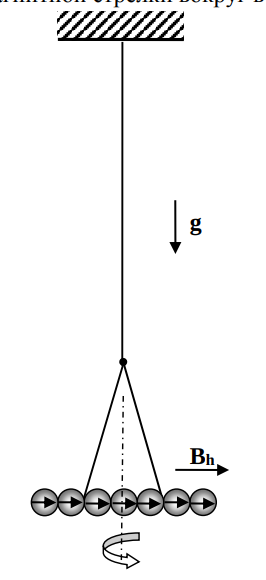

Вертикальную состовляющую будем мерить на той же установке, только теперь подвесим чётное число шариков на 1 нить. Теперь стрелка отклонится по вертикали на какой-то угол. Подвесим грузики так, чтобы стрелка пришла в горизонтальное положение. Тогда из равенства моментов сил получаем  
$m_{гр} g r_{гр}=nP_0B_v$, где $B_v$ - вертикальная состовляющая м.п Земли
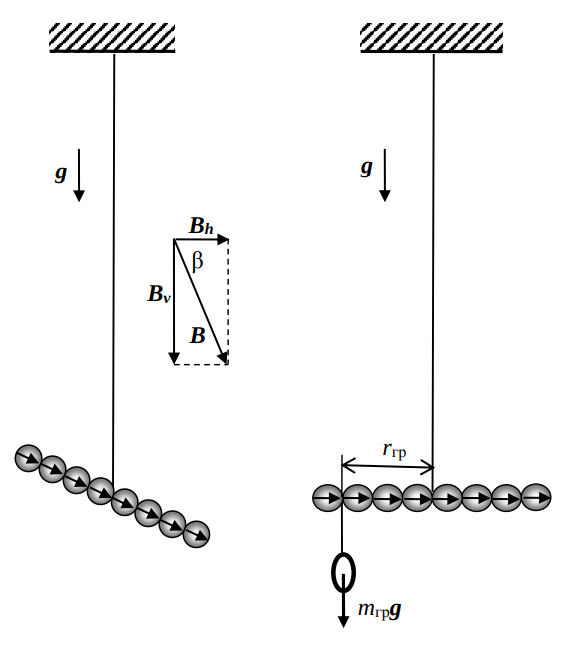

In [2]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [3]:
# Для кольца для 2 задания:
T_ring = 8.3
T_ring_error = 0.1

In [4]:
g = 980 # см/с^2

### Пункт 1. Измерение магнитного момента шариков
Для начала измерим магнитный момент шарика. Первый способ заключается в том, что мы разносим два шарика на такое расстояние, что сила тяжести уже начинает превосходить силу их взаимного притяжения. Поэтому из формулы $mg = \large \frac{6p_{m}{^2}}{r_{max}{^4}}$, где $m$ - масса одного шарика, $r_{max}$ - максимальное расстояние между ними, на котором ещё держатся, а $p_m$ - магнитный момент, который мы и хотим узнать, находим, что $p_m = r^2\sqrt{\large \frac{mg}{6}}$
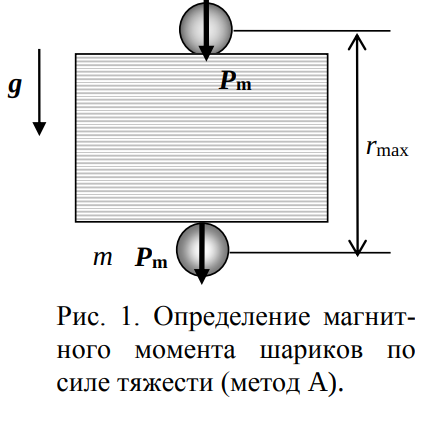

In [5]:
# Загружаем таблицу
task1 = pd.read_csv("task1.csv")
task1 = task1.T
task1.columns = task1.iloc[0]
task1 = task1.drop(['Таблица 1'])
for col in task1.columns:
    task1[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in task1[col]]
task1

Таблица 1,"$m$, г","$d$, мм","$r_{max}$, мм","$M$, г"
Value,0.845,5.96,18.2,414.185
Error,0.001,0.01,0.1,0.001


In [18]:
# Рассчитаем величину магнитного момента магнитика 𝑃𝑚 для метода А
m = task1['$m$, г']['Value']
dm = task1['$m$, г']['Error']
r = task1['$r_{max}$, мм']['Value']/10
dr = task1['$r_{max}$, мм']['Error']/10
p1 = (m*g/6)**0.5 * r**2
dp1 = p1*((dm/m * 0.5)**2 + (2*dr/r)**2)**0.5
print('Величина магнитного момента в эксперименте А:', p1.round(1), '±', dp1.round(1), 'эрг/Гс')

Величина магнитного момента в эксперименте А: 38.9 ± 0.4 эрг/Гс


Второй способ получить магитный момент - измерить силу, необходимую для разрыва двух шариков. Для этого будем подвешивать шарики друг к другу, пока от верхнего не оторвётся нижняя часть. Так как сила взаимодействия убывает как четвёртая степень от расстояния, можно рассматривать только верхние 3-4 шарика, а ниже можно подвешивать что угодно. Тогда получится, что $F=\large \frac{6p_m}{d^4} + \frac{6p_m}{(2d)^4} + \frac{6p_m}{(3d)^4} + \frac{6p_m}{(4d)^4} \normalsize \simeq 1.08F_0$, где $F_0$ - сила сцепления двух шаров. Откуда получаем, что магитный момент вычисляется по формуле:  
$p_m = d^2 \large \sqrt{\frac{F}{6 \cdot 1.08}}$, где $d$ - диаметр шарика, а $F$ - измеренная сила
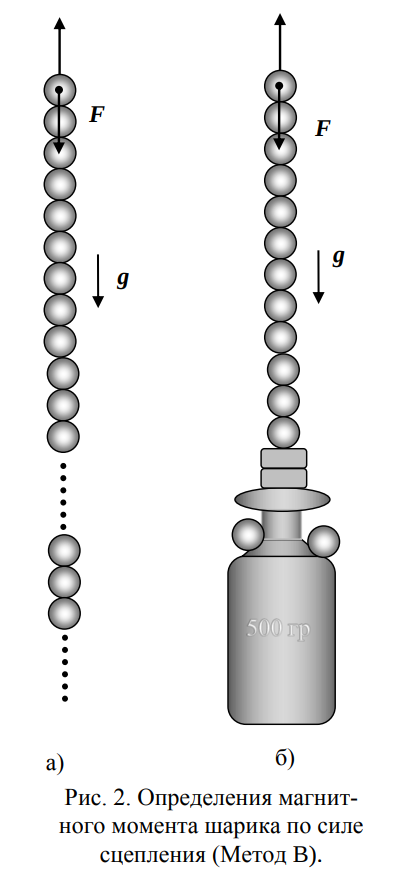

In [19]:
# Рассчитаем величину магнитного момента магнитика 𝑃𝑚 для метода В
M = task1['$M$, г']['Value']
dM = task1['$M$, г']['Error']
D = task1['$d$, мм']['Value'] / 10
dD = task1['$d$, мм']['Error'] / 10
p2 = (M*g/(1.08*6))**0.5 * D**2
dp2 = p2*((dM/M * 0.5)**2 + (2*dD/D)**2)**0.5
print('Величина магнитного момента в эксперименте B:', p2.round(1), '±', dp2.round(1), 'эрг/Гс')

Величина магнитного момента в эксперименте B: 88.9 ± 0.3 эрг/Гс


По каким-то причинам, они сильно отличаются. Видимо, это связано с какими-то ошибками в процессе измерения с помощью одного из методов. В принципе, можно узнать, где, скорее всего, ошибка, когда мы сравним полученный результат магнитного поля Земли с табличным.
Также мы измеряли с помощью прибора величину магнитной индукции на полюсе шарика. Поэтому мы можем вычислиить магнитный момент ещё так: $B_{max}=\large \frac{2p}{r^3}$ $\Rightarrow$ $p=\large \frac{B_{max}d^3}{16}$

In [27]:
B_max = 2400  # Гс
dB_max = 200  # Гс
p3 = B_max*D**3/16
dp3 = p3*((dB_max/B_max)**2 + (3*dD/D)**2)**0.5
print('Величина магнитного момента в эксперименте B:', p3.round(0), '±', dp3.round(0), 'эрг/Гс')


Величина магнитного момента в эксперименте B: 32.0 ± 3.0 эрг/Гс


Как видим, всё-таки первый способ получился точнее
В качестве итогового значения возьмём среднее из первого опыта и третьего

In [32]:
p = 0.5 * (p1 + p3)
dp = p * dp3/p3
print('Итоговая величина магнитного момента шарика:', p.round(0), '±', dp.round(0), 'эрг/Гс')


Итоговая величина магнитного момента шарика: 35.0 ± 3.0 эрг/Гс


### Пункт 2. Измерение горизонтальной составляющей магнитного поля Земли

Теперь приступим к самому измерению магнитного поля земли

In [33]:
# Загрузим данные из второй таблицы
task2 = pd.read_csv("task2.csv", index_col='Таблица 2')
for col in task2.columns:
    task2[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in task2[col]]
task2

,$n$,"$t_{1}$, с","$t_{2}$, с","$t_{3}$, с",$N$,"$T$, с"
Таблица 2,,,,,,
1,3,13.67,14.47,13.47,15,0.92
2,4,12.28,11.98,12.19,10,1.22
3,5,15.18,14.76,14.67,10,1.49
4,6,10.81,10.73,10.90,6,1.80
5,7,10.55,10.54,10.57,5,2.11
6,8,15.93,15.88,16.82,6,2.70
7,9,17.05,17.21,16.86,6,2.84
8,10,15.47,15.27,15.09,5,3.06
9,11,19.21,18.51,18.51,5,3.75


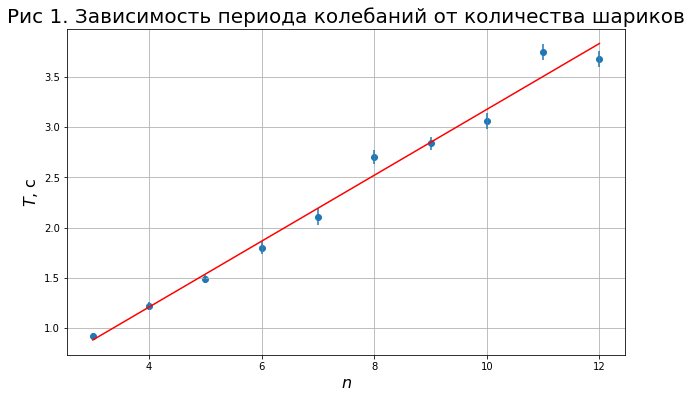

In [40]:
# Строим график
x = np.array(task2['$n$'])  # Количество шариков
y = np.array(task2['$T$, с'])  # Период

y_errors = np.array([np.float64(0.4*j/i) for i,j in zip(np.array(task2['$t_{1}$, с']), y)])

fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('Рис 1. Зависимость периода колебаний от количества шариков', fontsize=20)
plt.xlabel('$n$', fontdict=dict(size=16))
plt.ylabel('$T$, с', fontdict=dict(size=16))
plt.grid(True)  # сетка

# Точки для линейной экстраполяции
x_for_extr = x
y_for_extr = y
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(x_for_extr.min(), x_for_extr.max(), 10)

# Вывести точки и погрешности
plt.scatter(x,y)
plt.errorbar(x, y, yerr=y_errors, ecolor='#1f77b4', linestyle='None')
# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r')
plt.show()

In [44]:
# Определим погрешности коэффициентов a и b для графика
x_avg = np.average(x_for_extr)
y_avg = np.average(y_for_extr)
x_sqr_avg = np.average([i**2 for i in x_for_extr])
y_sqr_avg = np.average([i**2 for i in y_for_extr])
a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5
b_err = a_err * (x_sqr_avg - x_avg**2)**0.5
print ('Наклон: a = ', a.round(2), '+/-', a_err.round(2))
print ('Высота: b = ', b.round(2), '+/-', b_err.round(2))

Наклон: a =  0.33 +/- 0.01
Высота: b =  -0.1 +/- 0.04


In [47]:
# По коэффициенту наклона найдём горизонтальную состовляющую
B_h = (pi**2 * m * D**2)/(3 * a**2 * p)
dB_h = B_h*((dm/m)**2 + (2*dD/D)**2 + (2*a_err/a)**2 + (dp/p)**2)**0.5
print('Величина горизонтальной состовляющей магнитного поля Земли:', B_h.round(3), '±', dB_h.round(3), 'эрг/Гс')

Величина горизонтальной состовляющей магнитного поля Земли: 0.26 ± 0.03 эрг/Гс


### Пункт 3. Измерение вертикальной состовляющей магнитного поля Земли

In [49]:
task3 = pd.read_csv("task3.csv")
task3 = task3.T
task3.columns = task3.iloc[0]
task3 = task3.drop(['Таблица 3'])
for col in task3.columns:
    task3[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in task3[col]]
task3 = task3.T
task3

,$n$,"$m$, г","$l$, ш","$l$, мм"
Таблица 3,,,,
1,12.0,0.208,5.0,29.80
2,10.0,0.185,4.0,23.84
3,8.0,0.183,3.0,17.88
4,6.0,0.161,2.0,11.92
5,4.0,0.276,1.0,5.96


In [51]:
# Добавим столбец - момент сил груза, уравновешивающего конструкцию
task3['$M$, дин'] = [np.float64(g * x * y / 10).round(-1) for x, y in zip(task3['$m$, г'], task3['$l$, мм'])]
task3['$dM$, дин'] = [np.float64(((0.001/x)**2 + (1/y)**2)**0.5 * z).round(-1) for (x, y, z) in zip(task3['$m$, г'], task3['$l$, мм'], task3['$M$, дин'])]
task3

,$n$,"$m$, г","$l$, ш","$l$, мм","$M$, дин","$dM$, дин"
Таблица 3,,,,,,
1,12.0,0.208,5.0,29.80,610.0,20.0
2,10.0,0.185,4.0,23.84,430.0,20.0
3,8.0,0.183,3.0,17.88,320.0,20.0
4,6.0,0.161,2.0,11.92,190.0,20.0
5,4.0,0.276,1.0,5.96,160.0,30.0


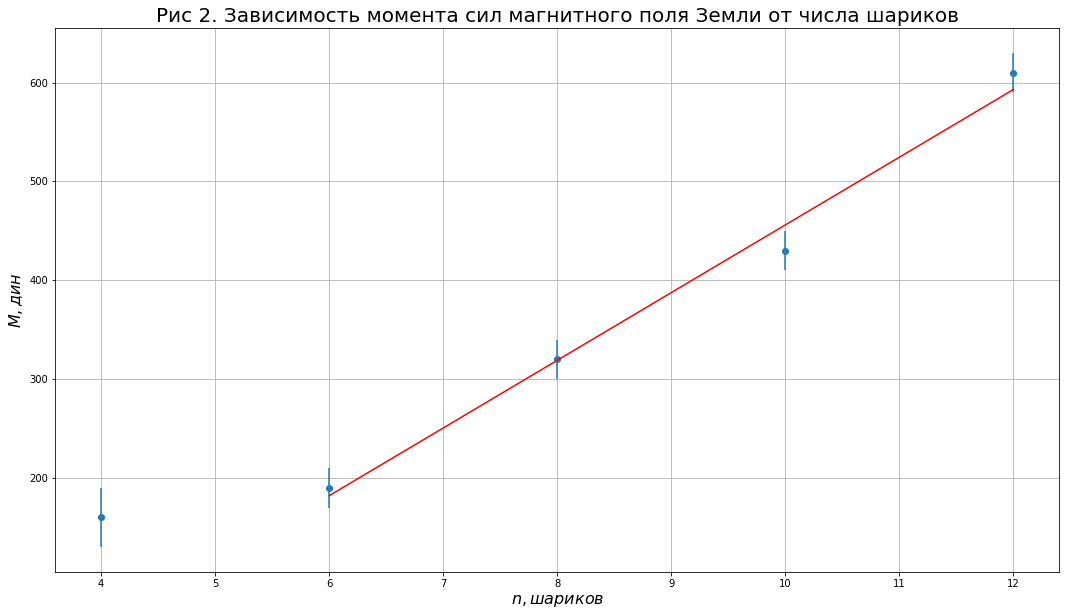

In [57]:
y = list(task3['$M$, дин'])
x = list(task3['$n$'])
y_errors = list(task3['$dM$, дин'])

fig = plt.figure(figsize=(18, 10))  # (Размер графика)
plt.title('Рис 2. Зависимость момента сил магнитного поля Земли от числа шариков', fontsize=20)
plt.xlabel('$n, шариков$', fontdict=dict(size=16))
plt.ylabel('$M, дин$', fontdict=dict(size=16))
plt.grid(True)  # сетка

plt.scatter(x, y) # точки графика
plt.errorbar(x, y, yerr=y_errors, ecolor='#1f77b4', linestyle='None') # погрешности

# Точки для линейной экстраполяции
x_for_extr = np.array(x[:4:] * 3)
y_for_extr = np.array(y[:4:] + [x + z for (x,z) in zip(y[:4], y_errors[:4])] + [x - z for (x,z) in zip(y[:4], y_errors[:4])])
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(x_for_extr.min(), x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член
# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')

plt.show()

In [65]:
# По угловому коэффициенту рассчитыем вертикальную составляющую магнитного поля Земли Bv
B_v = a/p2

# определяем погрешность коэффициента углового наклона
x_avg = np.average(x_for_extr)
y_avg = np.average(y_for_extr)
x_sqr_avg = np.average([i**2 for i in x_for_extr])
y_sqr_avg = np.average([i**2 for i in y_for_extr])
a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5

# определяем погрешность Bv
dB_v = ((a_err/a)**2 + (dp/p)**2)**0.5 * B_v
print('Вертикальная составляющая магнитного поля Земли:', B_v.round(1), '±', dB_v.round(1), 'Гс')

Вертикальная составляющая магнитного поля Земли: 0.8 ± 0.1 Гс


Теперь получим само значение, вычислив с помощью теоремы пифагора

In [70]:
B = (B_h**2 + B_v**2)**0.5
dB = ((dB_h)**2 + (dB_v)**2)**0.5
print('Итоговое значение индукции магнитного поля Земли:', B.round(1), '±', dB.round(1), 'Гс')

Итоговое значение индукции магнитного поля Земли: 0.8 ± 0.1 Гс


Табличное значение м.п Земли ~0.5 Гс. Как видим, мы почти уложились.

## Результаты и выводы

В данной работе измерялось магнитное поле Земли. Получили значение, отстающее от табличного на ~20%. Что это значит? Ну, тут есть пара значимых факторов:  
1) Неаккуратное проведение эксперимента  
2) Почти невозможность аккуратного проведения эксперимента, особенно в определении магнитного момента шариков. В первом опыте, допустим шарики прогинали листочки, из-за чего точное расстояние сложно было измерить. А в третьем способе (с помощью прибора) показания вообще скакали не пойми куда.
Так что с учётом этих не подающихся оценке погрешностей, наш результат не выглядит таким плохим.

Лабораторную работу подготовили: Иван Потяшин и Илья Ярлыков, группа Б05-814